#### Глава 3
#### 3.1. Линейная коррекция цвета
#### Автоконтраст черно-белого изображения
Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$
После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах. 

In [2]:
from skimage.io import imread, imshow
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

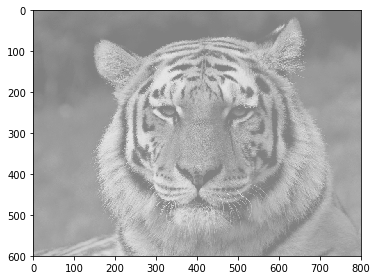

In [3]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-high-contrast.png")
imshow(img)
plt.show()

In [4]:
def autocontrast(img):
    Xmin = min(img.ravel())
    Xmax = max(img.ravel())
    k = 255/(Xmax-Xmin)
    img = ((img-Xmin)*k).astype('uint8')
    return img

In [7]:
img = autocontrast(img)
np.array_equal(img, img2)

True

#### Подсчет минимума и максимума устойчивого автоконтраста

Прочитайте изображение из файла img.png. Подсчитайте минимум и максимум яркости для стабильного автоконтраста этого изображения. Необходимо отбросить 5% самых светлых и 5% самых темных пикселей. Для получения числа отбрасываемых пикселей используйте формулу
𝑘=𝑟𝑜𝑢𝑛𝑑(#𝑝𝑖𝑥⋅0.05)
Два посчитанных числа (минимум и максимум) выведите на стандартный вывод через пробел.

In [9]:
def min_max_contrast(img):
    imgs = np.sort(img.ravel())
    trash = int(imgs.shape[0] *0.05)
    imgs = imgs[trash: imgs.shape[0]-trash]
    min_contrast = imgs[0]
    max_contrast = imgs[imgs.shape[0]-1]
    return min_contrast, max_contrast

In [10]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
print(min_max_contrast(img))

(129, 208)


#### Устойчивый автоконтраст черно-белого изображения

Прочитайте изображение из файла img.png. Примените к нему линейное выравнивание яркости: примените к каждому пикселю функцию
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$
Для вычисления максимума и минимума отбрасывайте по 5% самых светлых и самых темных пикселей (как в предыдущем задании). Перед вычислениями приведите изображение в вещественные числа (img.astype('float')), иначе может возникнуть переполнение (т.к. значения некоторых пикселей мы игнорируем при подсчете минимума и максимума). После растяжения яркости обрежьте значения изображения от 0 до 255 с помощью функции numpy.clip.

После вычисления функции значения изображения окажутся вещественными. Чтобы привести их к целым числам, используйте метод img.astype('uint8'), который возвращает изображение в целых числах.

In [11]:
img = imread("https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png")
img2 = imread("https://stepik.org/media/attachments/lesson/58402/tiger-stable-contrast.png")

In [12]:
def stable_autocontrast(img):
    min_contrast, max_contrast = min_max_contrast(img)
    img = img.astype('float')

    img = (img - min_contrast) * 255/(max_contrast - min_contrast)
    img = np.clip(img, 0, 255)
    img = img.astype('uint8')
    return img

In [13]:
img = stable_autocontrast(img)
np.array_equal(img, img2)

True

#### 3.2. Коррекция контраста цветного изображения
Устойчивый цветной автоконтраст

Прочитайте цветное изображение из файла img.png. Примените к нему устойчивый автоконтраст. Для этого:
1. Переведите изображение в вещественные числа от 0 до 1.
2. Переведите изображение в пространство YUV по формулам:

$Y =0.2126⋅𝑅+0.7152⋅𝐺+0.0722⋅𝐵$

$U =−0.0999⋅𝑅−0.3360⋅𝐺+0.4360⋅𝐵$

$V =  0.6150⋅𝑅−0.5586⋅𝐺−0.0563⋅𝐵$

3. Найдите максимум и минимум для устойчивого автоконтраста с отбрасыванием 5% самых светлых и 5% самых темных пикселей.
4. Примените линейное растяжение канала Y по формуле
$f(x) = (x - x_{min}) \cdot \frac{255}{x_{max} - x_{min}}$

5. Обрежьте значения канала Y от 0 до 1.
6. Переведите изображение в пространство RGB по формулам:

$𝑅=𝑌+1.2803⋅𝑉$

$G=𝑌−0.2148⋅𝑈−0.3805⋅𝑉$

$B=𝑌+2.1279⋅𝑈$
7. Обрежьте значения изображения от 0 до 1.
8. Переведите изображение в целые числа от 0 до 255.

In [27]:
img = imread("https://stepik.org/media/attachments/lesson/60609/tiger-color.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png")

In [28]:
def stable_autocontrast_color(img):
    img_copy = img.copy()
    # перевод изображения в вещественные числа от 0 до 1.
    img_f = img_as_float(img_copy)

    # перевод изображения в пространство YUV

    R = img_f[:,:,0]
    G = img_f[:,:,1]
    B = img_f[:,:,2]

    Y =  0.2126* R + 0.7152* G + 0.0722* B
    U = -0.0999* R - 0.3360* G + 0.4360* B
    V =  0.6150* R - 0.5586* G - 0.0563* B
    
    left, right = min_max_contrast(Y)
    
    # применение линейного растяжения канала Y и обрезка значения канала Y от 0 до 1
    Y = np.clip((Y - left)/(right - left), 0 , 1)

    #6. Переведите изображение в пространство RGB
    #7. Обрежьте значения изображения от 0 до 1.
    R = np.clip(Y + 1.2803*V, 0 , 1)
    G = np.clip(Y - 0.2148*U - 0.3805*V, 0 , 1)
    B = np.clip(Y + 2.1279*U, 0 , 1)

    #8. Переведите изображение в целые числа от 0 до 255.
    img_copy = img_as_ubyte(np.dstack((R , G, B)))
    return img_copy

In [29]:
img = stable_autocontrast_color(img)
np.array_equal(img, img2)

True

#### 3.3. Баланс белого. Модель «серого мира»
#### Преобразование серого мира

Прочитайте изображение из файла img.png. Примените к нему преобразование серого мира. Для этого:
1. Сконвертируйте изображение в вещественные числа.
2. Подсчитайте коэффициенты 𝑟𝑤,𝑔𝑤,𝑏𝑤 как описано в видео.
3. Поделите каналы изображения на коэффициенты.
4. Обрежьте значения пикселей, чтобы они не выходили из допустимого диапазона ([0; 255] или [0;1]).

In [50]:
img = imread("https://stepik.org/media/attachments/lesson/60610/railroad.png")
img2 = imread("https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png")

In [55]:
def gray_world_model(img):

    #1. Сконвертируйте изображение в вещественные числа.
    img = img_as_float(img)

    R = img[:,:, 0]
    G = img[:,:, 1]
    B = img[:,:, 2]

    #2. Подсчитайте коэффициенты 𝑟𝑤,𝑔𝑤,𝑏𝑤
    avg = (R.mean() + G.mean() + B.mean())/3
    rw = R.mean()/avg
    gw = G.mean()/avg
    bw = B.mean()/avg

    #3. Поделите каналы изображения на коэффициенты.
    #4. Обрежьте значения пикселей, чтобы 
    #они не выходили из допустимого диапазона ([0; 255] или [0;1]).
    R = np.clip(R/rw, 0, 1)
    G = np.clip(G/gw, 0, 1)
    B = np.clip(B/bw, 0, 1)

    img = img_as_ubyte(np.dstack((R , G, B)))
    
    return img

In [56]:
img = gray_world_model(img)
np.array_equal(img, img2)

True

#### 3.4. Выравнивание гистограммы
#### Выравнивание гистограммы
Прочитайте изображение из файла img.png. Примените к нему выравнивание гистограммы по алгоритму, описанному в слайдах и видео. Работать достаточно в целых числах, помещающихся в байт (т.е. изображение конвертировать не нужно). 

In [57]:
img = imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
img2 = imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')

In [58]:
def histogram_equalization(img):
    # считывание гистограммы изображения
    h = np.histogram(img, bins=range(257))[0]

    # считывание функции распределения (cdf) по гистограмме
    cdf = np.cumsum(h)

    cdf_min = cdf[cdf.nonzero()].min()
    npix = cdf[-1]

    res = img.copy()
    
    # обновление значения пикселей изображения по формуле:
    for row in range(img.shape[0]):
        for col in range (img.shape[1]):
            pix = img[row][col]
            res[row][col] = round((cdf[pix]-cdf_min)/(npix-1)*255)
    return res

In [59]:
img = histogram_equalization(img)
np.array_equal(img, img2)

True